In [1]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import sys, os
import numpy as np

In [2]:
path_to_file = os.path.join(os.getcwd(),"nc_000913.pal")
file = open(path_to_file, "r")
lines = file.read().splitlines()

In [3]:
def make_seq_data(positions1, positions2, basecalls1, basecalls2):
    return [positions1, positions2, basecalls1, basecalls2]

def get_start_pos(seq_data, seqno):
    #takes in SEQNO 0 or 1 to return the starting position
    return seq_data[seqno][0]

def get_end_pos(seq_data, seqno):
    #takes in SEQNO 0 or 1 to return the starting position
    return seq_data[seqno][1]

list_of_seqs = []
for i in range(1, len(lines)):
    if "|" in lines[i]:
        positions1 = [int(n) for n in lines[i - 1].split() if n.isdigit()]
        basecalls1 = [n for n in lines[i - 1].split() if not n.isdigit()]
        positions2 = [int(n) for n in lines[i + 1].split() if n.isdigit()]
        positions2.reverse()
        basecalls2 = [n for n in lines[i + 1].split() if not n.isdigit()]
        list_of_seqs.append(make_seq_data(positions1, positions2, basecalls1, basecalls2))

def find_hyperparam_no(data_in_lines, lookup):
    for line in data_in_lines:
        if lookup in line:
            hyperparam = [int(n) for n in line.split() if n.isdigit()]
    assert len(hyperparam) == 1, "Mismatched number of ints"
    return hyperparam[0]

min_len_pal_hyperparam = find_hyperparam_no(lines, "Minimum length of Palindromes")
max_len_pal_hyperparam = find_hyperparam_no(lines, "Maximum length of Palindromes")
max_gap_pal_hyperparam = find_hyperparam_no(lines, "Maximum gap between elements")
max_mis_pal_hyperparam = find_hyperparam_no(lines, "Number of mismatches allowed")

In [4]:
#find length of inverted repeat vs nonrepeats
len_repeats = []
prop_pals = []
for seq_data in list_of_seqs:
    length_of_palindromes = get_end_pos(seq_data, 0) - get_start_pos(seq_data, 0)
    length_of_sequence = get_end_pos(seq_data, 1) - get_start_pos(seq_data, 0)
    proportion_palindromes = length_of_palindromes / length_of_sequence
    
    len_repeats.append(length_of_palindromes)
    prop_pals.append(proportion_palindromes)

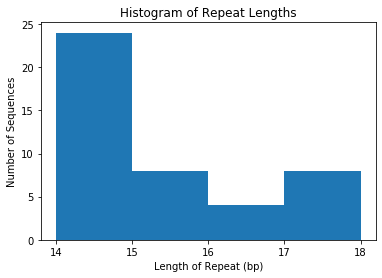

In [5]:
plt.hist(len_repeats, bins = range(min(len_repeats), max(len_repeats) + 1, 1))
plt.title("Histogram of Repeat Lengths")
plt.xlabel("Length of Repeat (bp)")
plt.ylabel("Number of Sequences")
plt.xticks(range(min(len_repeats), max(len_repeats) + 1, 1))
#plt.show()

saved_name = "min_len_%d_max_len_%d_max_gap_%d_max_mis_%d" % (min_len_pal_hyperparam,
                                                              max_len_pal_hyperparam,
                                                              max_gap_pal_hyperparam,
                                                              max_mis_pal_hyperparam)
plt.savefig(saved_name)